In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [30]:
df = pd.read_csv('titanic_toy.csv')

In [31]:
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [32]:
# Calculating missing values

df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [33]:
# Train Test Split

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [34]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [35]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [36]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare  =X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [37]:
X_train['Age_median']  = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)


In [38]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
562,28.0,NaN,0,28.00,28.000000,14.4583,32.617597
324,NaN,69.5500,10,28.75,29.785904,69.5500,69.550000
14,14.0,7.8542,0,14.00,14.000000,7.8542,7.854200
841,16.0,10.5000,0,16.00,16.000000,10.5000,10.500000
737,35.0,512.3292,0,35.00,35.000000,512.3292,512.329200


In [39]:
print('Orignal Age variable variance:', X_train['Age'].var())
print('Age Variance after median imputations : ', X_train['Age_median'].var())
print('Age variance after mean imputation : ', X_train['Age_mean'].var())

print('Orignal Fare variable variance : ', X_train['Fare'].var())
print('Fare Variance after median imputations : ', X_train['Fare_median'].var())
print('Fare variance after mean imputation : ', X_train['Fare_mean'].var())


Orignal Age variable variance: 204.3495133904614
Age Variance after median imputations :  161.9895663346054
Age variance after mean imputation :  161.81262452718673
Orignal Fare variable variance :  2448.197913706318
Fare Variance after median imputations :  2340.0910219753637
Fare variance after mean imputation :  2324.2385256705547


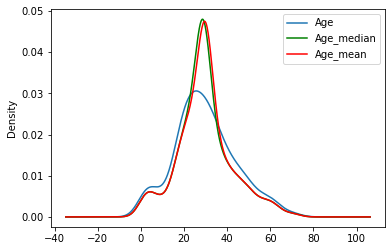

In [40]:
# Ploting the distribution of data

fig = plt.figure()
ax = fig.add_subplot(111)

# orignal variable distribution
X_train['Age'].plot(kind = 'kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind = 'kde', ax=ax, color = 'green')

# variable imputed with the mean
X_train['Age_mean'].plot(kind = 'kde', ax=ax, color = 'red')

# add legends 

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

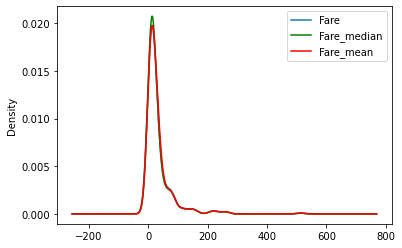

In [41]:
    # Ploting the distribution of data

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # orignal variable distribution
    X_train['Fare'].plot(kind = 'kde', ax=ax)

    # variable imputed with the median
    X_train['Fare_median'].plot(kind = 'kde', ax=ax, color = 'green')

    # variable imputed with the mean
    X_train['Fare_mean'].plot(kind = 'kde', ax=ax, color = 'red')

    # add legends 

    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc = 'best')

In [42]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [43]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<AxesSubplot:>

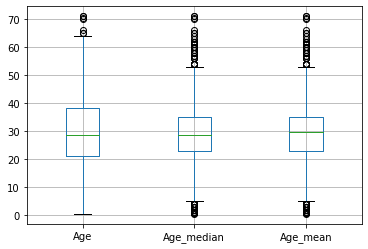

In [44]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<AxesSubplot:>

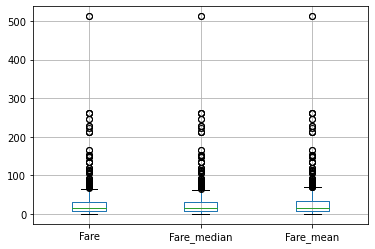

In [45]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

<b> Using Sklearn </b>

In [54]:
# Train Test Split

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [55]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')


In [56]:
trf = ColumnTransformer([
    ('imputer1', imputer1,['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [57]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [58]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [59]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [60]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [61]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])